In [8]:
import numpy as np
import pandas as pd

path=''  # si les données sont déjà dans le répertoire courant
data = pd.read_csv(path + 'Data_Etudiants_2023.txt', sep=";")
data.head()
#print("Le nombre d'individus est : {}. Le nombre de variables est : {]".format(data.size(0),data.size(1))

,T1_1h_R1,T1_2h_R1,T1_3h_R1,T1_4h_R1,T1_5h_R1,T1_6h_R1,T2_1h_R1,T2_2h_R1,T2_3h_R1,T2_4h_R1,...,T2_3h_R2,T2_4h_R2,T2_5h_R2,T2_6h_R2,T3_1h_R2,T3_2h_R2,T3_3h_R2,T3_4h_R2,T3_5h_R2,T3_6h_R2
G1,0.167009,0.682881,-0.180178,0.075348,-0.001642,0.501269,-0.590392,0.192059,0.815695,2.266757,...,0.263301,1.907773,2.466574,3.396958,0.696610,1.040833,0.810486,2.525922,3.268041,3.089573
G2,0.187621,0.815365,-0.045735,0.181518,0.467269,-0.759716,0.377821,2.510333,2.387657,2.998971,...,2.761253,2.440673,2.381917,2.260745,0.676540,2.443796,2.713063,2.867855,2.622922,2.051829
G3,-0.052076,-0.029437,0.261409,-0.317389,-0.386266,0.420686,0.208241,-0.998712,-2.583815,-3.372319,...,-1.769917,-3.323948,-2.632251,-2.877618,-0.281549,-1.292713,-1.913824,-3.886458,-3.129329,-3.110750
G4,-0.230785,-0.753947,-0.244923,-0.704300,-0.117073,-0.382628,0.409572,0.233312,0.967910,0.890278,...,1.024548,2.059611,1.737199,2.359006,0.094011,0.944675,0.404325,1.155446,1.890564,2.442747
G5,-0.205473,-0.688821,-0.181084,-0.066565,0.521709,0.448094,-0.449139,-1.514382,-3.815376,-2.503011,...,-2.398936,-2.551766,-2.474437,-3.144543,-0.619518,-2.706419,-2.828498,-2.849342,-2.938259,-3.390693


In [9]:
print(data.shape)

(1615, 36)


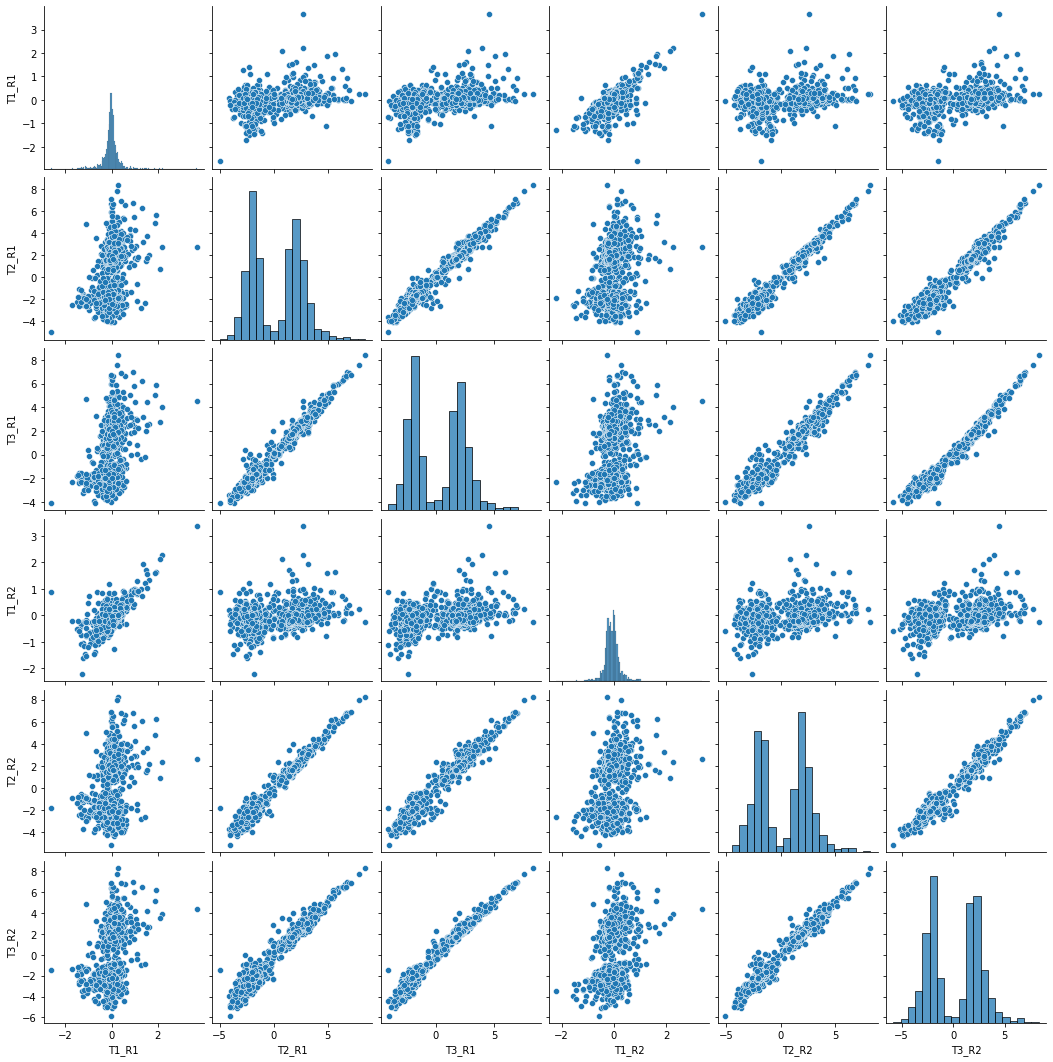

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

data_copy = data.copy()
data_copy["T1_R1"] = data.iloc[:, :6].mean(axis=1)
data_copy["T2_R1"] = data.iloc[:, 6:12].mean(axis=1)
data_copy["T3_R1"] = data.iloc[:, 12:18].mean(axis=1)
data_copy["T1_R2"] = data.iloc[:, 18:24].mean(axis=1)
data_copy["T2_R2"] = data.iloc[:, 24:30].mean(axis=1)
data_copy["T3_R2"] = data.iloc[:, 30:36].mean(axis=1)

new_data = data_copy.iloc[:, 36:42]

sns.pairplot(new_data)
plt.show()



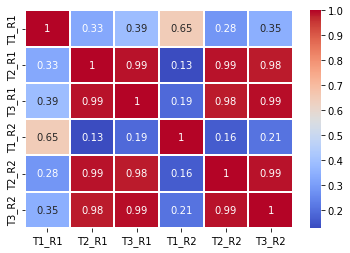

In [11]:
corr = new_data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.2)
plt.show()

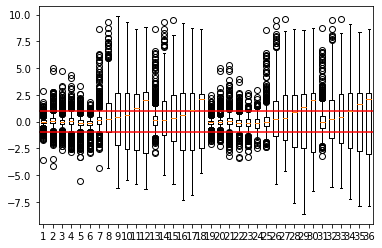

In [12]:
plt.boxplot(data)
plt.axhline(y=1,c='r')
plt.axhline(y=-1,c='r')
plt.show()

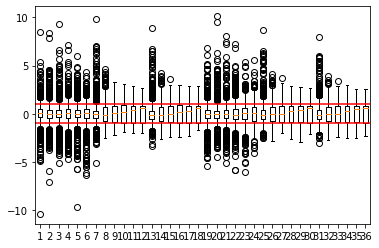

In [13]:
from sklearn.preprocessing import scale
# réduction
data_scaled=scale(data)

plt.boxplot(data_scaled)
plt.axhline(y=1,c='r')
plt.axhline(y=-1,c='r')
plt.show()

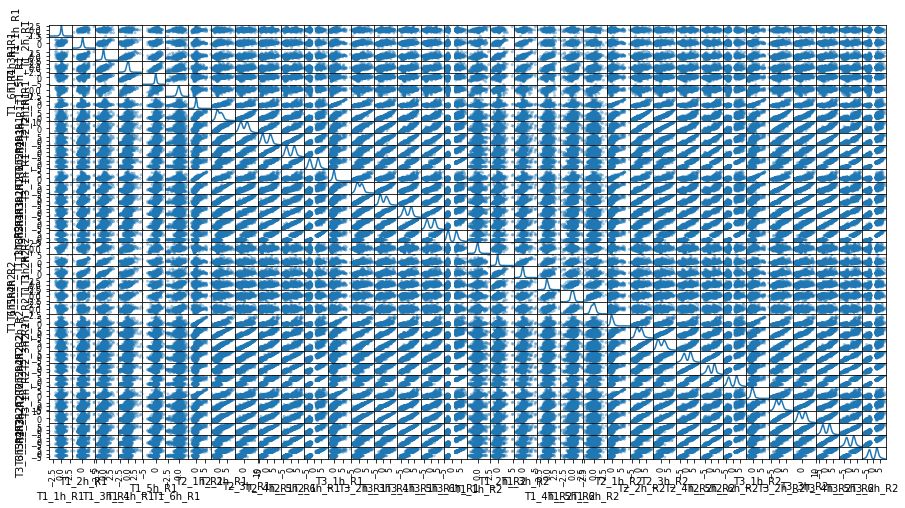

In [14]:
pd.plotting.scatter_matrix(data, alpha=0.4, figsize=(15, 8), diagonal='kde')
plt.show()

In [15]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,T1_1h_R1,T1_2h_R1,T1_3h_R1,T1_4h_R1,T1_5h_R1,T1_6h_R1,T2_1h_R1,T2_2h_R1,T2_3h_R1,T2_4h_R1,T2_5h_R1,T2_6h_R1,T3_1h_R1,T3_2h_R1,T3_3h_R1,T3_4h_R1,T3_5h_R1,T3_6h_R1,T1_1h_R2,T1_2h_R2,T1_3h_R2,T1_4h_R2,T1_5h_R2,T1_6h_R2,T2_1h_R2,T2_2h_R2,T2_3h_R2,T2_4h_R2,T2_5h_R2,T2_6h_R2,T3_1h_R2,T3_2h_R2,T3_3h_R2,T3_4h_R2,T3_5h_R2,T3_6h_R2
T1_1h_R1,1.000000,0.342041,0.140206,0.160123,0.140882,0.080512,0.200077,0.064087,0.051911,0.020660,0.013621,-0.007931,0.281954,0.100860,0.044832,0.045574,0.017050,-0.019090,0.377951,0.116770,0.173623,0.043846,0.048778,0.014700,0.053617,0.026396,0.021251,-0.002001,-0.007113,-0.007929,0.122595,0.027307,0.045132,0.016838,0.000187,-0.012558
T1_2h_R1,0.342041,1.000000,0.445645,0.411786,0.326056,-0.114110,0.153706,0.308160,0.247743,0.216123,0.197587,0.204240,0.252981,0.385086,0.282278,0.254448,0.224141,0.200533,0.165537,0.500792,0.697757,0.038511,0.038839,-0.109293,0.155181,0.233580,0.247141,0.123517,0.111089,0.153245,0.169279,0.286965,0.294824,0.196931,0.160591,0.164204
T1_3h_R1,0.140206,0.445645,1.000000,0.655504,0.478121,0.381943,0.207322,0.290335,0.290600,0.286388,0.289230,0.290490,0.306158,0.390631,0.384148,0.337164,0.338542,0.324064,0.360799,0.623236,0.711005,0.528998,0.223425,0.049052,0.258586,0.288217,0.300404,0.276886,0.266116,0.287092,0.385361,0.394431,0.379001,0.332905,0.295906,0.307720
T1_4h_R1,0.160123,0.411786,0.655504,1.000000,0.636321,0.352938,0.259711,0.387222,0.387071,0.410750,0.397084,0.392572,0.332905,0.454002,0.449945,0.452489,0.450528,0.408333,0.321285,0.347696,0.606583,0.402323,0.250781,-0.029618,0.313047,0.340644,0.376473,0.354447,0.338489,0.377267,0.424869,0.410723,0.441091,0.418635,0.373453,0.382882
T1_5h_R1,0.140882,0.326056,0.478121,0.636321,1.000000,0.486260,0.146040,0.237202,0.209404,0.237059,0.268679,0.217897,0.201452,0.244884,0.257900,0.246136,0.288358,0.245670,0.240307,0.180474,0.305153,0.283051,0.414248,0.298857,0.133504,0.145419,0.181143,0.172377,0.176014,0.218015,0.280240,0.195032,0.217779,0.229651,0.212351,0.223144
T1_6h_R1,0.080512,-0.114110,0.381943,0.352938,0.486260,1.000000,0.045245,-0.041153,-0.032149,-0.004452,0.017563,0.028349,0.076907,-0.035349,0.016328,-0.015403,0.025965,0.070508,0.226285,0.074614,0.017662,0.386270,0.343752,0.481362,0.000175,-0.051498,-0.040044,0.028602,0.030317,0.064670,0.135271,-0.016275,-0.014195,0.013944,0.022653,0.066053
T2_1h_R1,0.200077,0.153706,0.207322,0.259711,0.146040,0.045245,1.000000,0.722499,0.568219,0.516132,0.478510,0.429263,0.932996,0.688600,0.573361,0.507235,0.466032,0.430874,0.130123,0.101641,0.219644,0.050152,0.030409,-0.085377,0.891736,0.666730,0.592319,0.494316,0.468894,0.411484,0.823262,0.625374,0.568017,0.487931,0.441021,0.406674
T2_2h_R1,0.064087,0.308160,0.290335,0.387222,0.237202,-0.041153,0.722499,1.000000,0.934813,0.888984,0.853695,0.803390,0.774302,0.968371,0.929438,0.873014,0.838083,0.798796,0.221056,0.165605,0.385123,0.030878,-0.065954,-0.222406,0.810116,0.962132,0.951405,0.844769,0.810781,0.779652,0.785044,0.937149,0.922071,0.853330,0.798825,0.775701
T2_3h_R1,0.051911,0.247743,0.290600,0.387071,0.209404,-0.032149,0.568219,0.934813,1.000000,0.961252,0.937931,0.898643,0.638922,0.927417,0.966855,0.947072,0.925420,0.887472,0.262830,0.149384,0.381267,0.050904,-0.098333,-0.258959,0.685076,0.954757,0.983098,0.938719,0.913815,0.886097,0.683632,0.938683,0.961811,0.942064,0.904428,0.880894
T2_4h_R1,0.020660,0.216123,0.286388,0.410750,0.237059,-0.004452,0.516132,0.888984,0.961252,1.000000,0.985044,0.951677,0.582143,0.896064,0.955869,0.979714,0.975239,0.945008,0.301812,0.136107,0.385075,0.040528,-0.126350,-0.267272,0.666003,0.903544,0.949801,0.965488,0.954067,0.938883,0.673127,0.909672,0.949258,0.975146,0.955699,0.937746


In [16]:
import plotly.express as px
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
fig = px.imshow(corr)
fig.show()

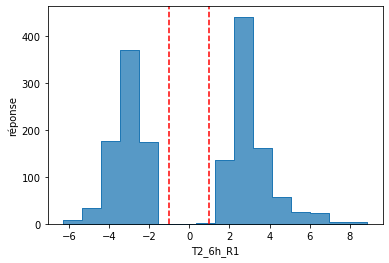

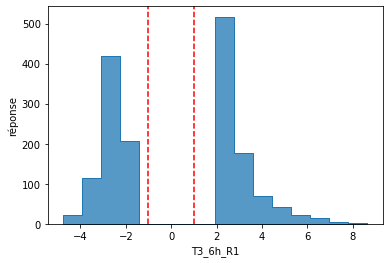

In [17]:
sns.histplot(data=data, x=data.iloc[:,11], element='step', fill='blue')
plt.ylabel("réponse")
plt.xlabel("T2_6h_R1")
plt.axvline(x=1, color='red', linestyle='dashed')
plt.axvline(x=-1, color='red', linestyle='dashed')
plt.show()

sns.histplot(data=data, x=data.iloc[:,17], element='step', fill='blue')
plt.ylabel("réponse")
plt.xlabel("T3_6h_R1")
plt.axvline(x=1, color='red', linestyle='dashed')
plt.axvline(x=-1, color='red', linestyle='dashed')
plt.show()


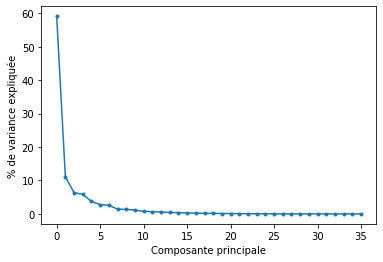

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
cpa_data_scaled = pca.fit_transform(data_scaled)
# Eboulis
plt.plot(100*pca.explained_variance_ratio_,".-")
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

In [19]:
import plotly.graph_objects as go

eigenvalues = pca.explained_variance_ratio_
scree_data = pd.DataFrame({'PC': range(1, len(eigenvalues)+1), 'Eigenvalue': eigenvalues})

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=scree_data.iloc[:10,:]['PC'],
        y=scree_data.iloc[:10,:]['Eigenvalue'],name = ""
    ))

fig.add_trace(
    go.Bar(
        x=scree_data.iloc[:10,:]['PC'],
        y=scree_data.iloc[:10,:]['Eigenvalue'], name = "Percentage of explained variances"
    ))

fig.show()

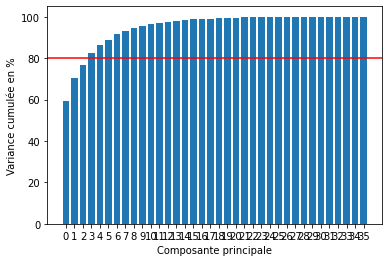

In [20]:
ratios = np.cumsum(100*pca.explained_variance_ratio_)

plt.bar(range(len(ratios)), np.cumsum(100*pca.explained_variance_ratio_))
plt.xticks(range(len(ratios)))
plt.axhline(y=80,c='r')
plt.xlabel("Composante principale")
plt.ylabel("Variance cumulée en %")
plt.show()

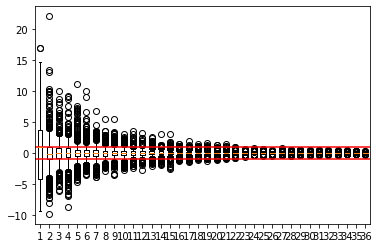

In [21]:
plt.boxplot(cpa_data_scaled)
plt.axhline(y=1,c='r')
plt.axhline(y=-1,c='r')
plt.show()

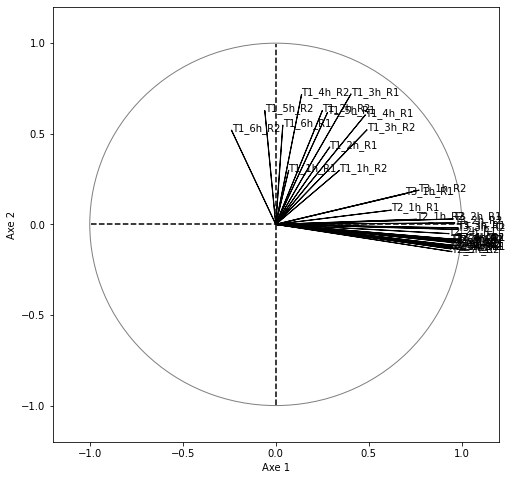

In [22]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.axhline(y=0,xmin=0.085,xmax=0.915,linestyle="--",c='k')
plt.axvline(x=0,ymin=0.085,ymax=0.915,linestyle="--",c='k')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.show()

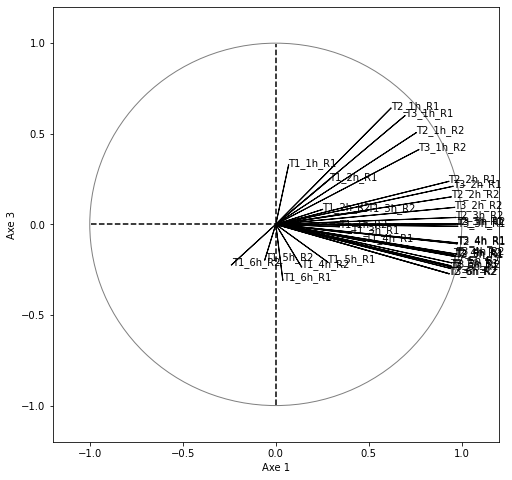

In [23]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.axhline(y=0,xmin=0.085,xmax=0.915,linestyle="--",c='k')
plt.axvline(x=0,ymin=0.085,ymax=0.915,linestyle="--",c='k')
plt.xlabel("Axe 1")
plt.ylabel("Axe 3")
plt.show()

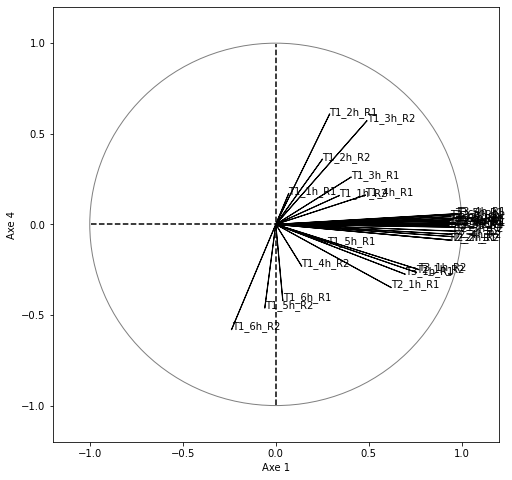

In [24]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord4, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.axhline(y=0,xmin=0.085,xmax=0.915,linestyle="--",c='k')
plt.axvline(x=0,ymin=0.085,ymax=0.915,linestyle="--",c='k')
plt.xlabel("Axe 1")
plt.ylabel("Axe 4")
plt.show()

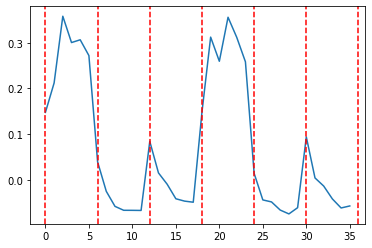

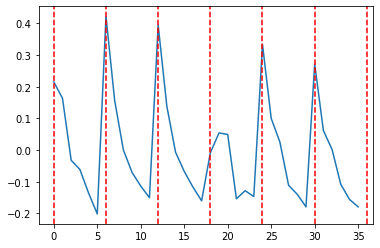

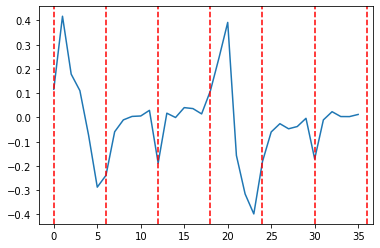

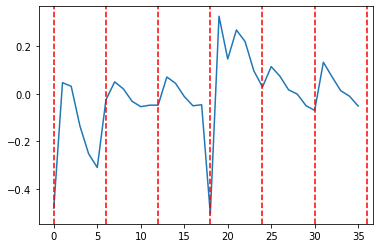

In [25]:
for i in range(1,5):
    plt.plot(pca.components_[i])
    plt.axvline(x=0,linestyle="--",c='r')
    plt.axvline(x=6,linestyle="--",c='r')
    plt.axvline(x=12,linestyle="--",c='r')
    plt.axvline(x=18,linestyle="--",c='r')
    plt.axvline(x=24,linestyle="--",c='r')
    plt.axvline(x=30,linestyle="--",c='r')
    plt.axvline(x=36,linestyle="--",c='r')
    plt.show()